In [17]:
!cp ImageBot_Triangles.ipynb /home/jack/Desktop/GRAPHICS

# This is the working program. 
# It randomly chooses an image and 'paints it'

In [ ]:
# %load ImageBot
#!/bin/bash

while true; do
  python ImageBot1.py
  echo "posted :"
  date
  sleep 1800s
done

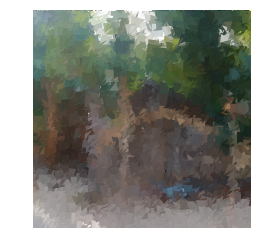

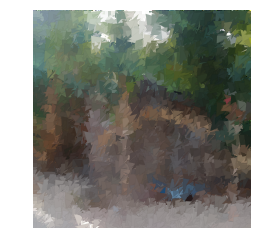

In [16]:
#%%writefile ImageBot1.py
#!/home/jack/anaconda2/bin
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/Desktop/pycode/vpython2")
import twython
from twython import Twython
import time
#nap=randint(10,400)
#time.sleep(nap)
path = r"/home/jack/Desktop/GRAPHICS/gmic/640x640/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)
#filename0= "/home/jack/Desktop/BOTS/Anotebook/TEMP-img4a.png"
#base_image ="/home/jack/Desktop/deep-dream-generator/notebooks/new/2/"
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(filename0)
image = image.resize((640,640), Image.ANTIALIAS)
size = image.size

# create numpy array from the opened image 
im = np.array(image, dtype=np.uint8)

# Plot figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,35)
        offset_factor = randint(10,35)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')
#Create a second image
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(filename0)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
        #textin = (generate_the_word("wordcloud.txt"))

# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,35)
        offset_factor = randint(10,35)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2b.jpg')


img0 = Image.open("images/Sranger-Tri-001-crop2a.jpg")
img1 = Image.open("images/Sranger-Tri-001-crop2b.jpg")
blen = ImageChops.blend(img0, img1, .5)
blen.save('images/Sranger-Tri-001-crop2b.jpg')
base = Image.open('images/Sranger-Tri-001-crop2b.jpg').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))
def generate_the_word(infile):
    with open(infile) as f:
            contents_of_file = f.read()
    lines = contents_of_file.splitlines()
    line_number = random.randrange(0, len(lines))
    return lines[line_number]
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
marginx = 225
marginy = 50
x = width - marginx
y = height - marginy
signature_ = "The TwitterBot Project" 
d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

out = Image.alpha_composite(base, txt)
out.save("images/tmp.png", "PNG")
# save the image then reopen to put a title
base = Image.open('images/tmp.png').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
x = 90
y = 10
#generate a title
title = (generate_the_word("/home/jack/Desktop/BOTS/text/titles.txt"))
d.text((x,y), title , font=fnt, fill=(0,0,0,250))
out2 = Image.alpha_composite(base, txt)
out2.save("images/TM_POST.png", "PNG")
#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
f = open("/home/jack/Desktop/BOTS/text/art.txt")
text = f.read()
# Build the model.
text_model = markovify.Text(text)
STR = (text_model.make_short_sentence(140))
#STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
PATH = "images/TM_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])


In [15]:
!showme images/TM_POST.png

In [10]:
!sudo locate titles.txt

/home/jack/Desktop/BOTS/text/titles.txt
/home/jack/Desktop/pycode/vpython2/TrigonometryBot/titles.txt


http://interactivepython.org/runestone/static/thinkcspy/MoreAboutIteration/2DimensionalIterationImageProcessing.html<br />
https://ondras.github.io/primitive.js/<br />
https://automatetheboringstuff.com/chapter17/

In [5]:
!mkdir images

In [ ]:
import os
os.chdir('images')

In [2]:
!mkdir images

In [3]:
!wget -O images/ranger.jpg https://vignette3.wikia.nocookie.net/pdsh/images/e/eb/Black_Diamond.jpg

--2017-08-19 06:52:26--  https://vignette3.wikia.nocookie.net/pdsh/images/e/eb/Black_Diamond.jpg
Resolving vignette3.wikia.nocookie.net (vignette3.wikia.nocookie.net)... 151.101.192.194, 151.101.64.194, 151.101.0.194, ...
Connecting to vignette3.wikia.nocookie.net (vignette3.wikia.nocookie.net)|151.101.192.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1365705 (1.3M) [image/jpeg]
Saving to: ‘images/ranger.jpg’

images/ranger.jpg   100%[===================>]   1.30M   246KB/s    in 5.5s    

2017-08-19 06:52:33 (244 KB/s) - ‘images/ranger.jpg’ saved [1365705/1365705]



In [6]:
from PIL import Image
im = Image.open('images/ranger.jpg')
im.size

(1871, 2240)

In [16]:
from PIL import Image
im = Image.open('images/ranger.jpg')
w,h = im.size
re = im.resize((w/4,h/4), Image.NEAREST)
re.save('images/Sranger.jpg')


In [22]:
!showme images/Sranger.jpg

In [25]:
from PIL import ImageEnhance
from PIL import Image
im = Image.open('images/Sranger.jpg')
enhancer = ImageEnhance.Sharpness(im)

eh = enhancer.enhance(4)
eh.show("Sharpness %f" % 4)

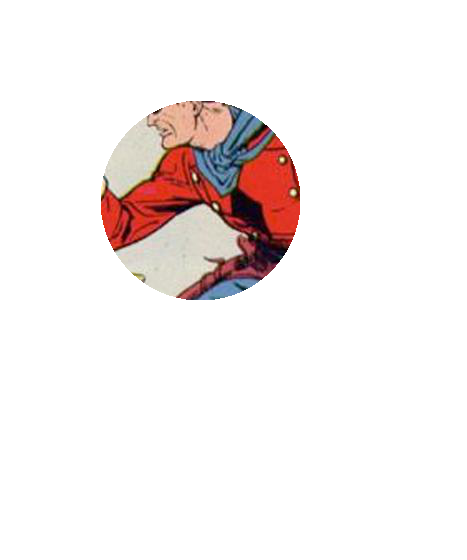

In [28]:
import numpy as np
from PIL import Image

# read image as RGB and add alpha (transparency)
im = Image.open("images/Sranger.jpg").convert("RGBA")

# convert to numpy (for convenience)
imArray = np.asarray(im)

# create mask (zeros + circle with ones)
center = (200,200)
radius = 100
mask = np.zeros((imArray.shape[0],imArray.shape[1]))
for i in range(imArray.shape[0]):
    for j in range(imArray.shape[1]):
        if (i-center[0])**2 + (j-center[0])**2 < radius**2:
            mask[i,j] = 1

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255          

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("images/Sranger001.jpg")
newIm

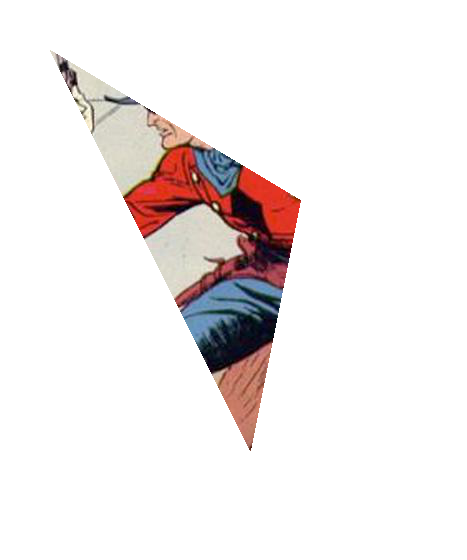

In [33]:
import numpy as np
from PIL import Image, ImageDraw

# read image as RGB and add alpha (transparency)
im = Image.open("images/Sranger.jpg").convert("RGBA")

# convert to numpy (for convenience)
imArray = np.asarray(im)

# create mask (zeros + circle with ones)
#center = (200,200)
#radius = 100
#mask = np.zeros((imArray.shape[0],imArray.shape[1]))
#for i in range(imArray.shape[0]):
#    for j in range(imArray.shape[1]):
#        if (i-center[0])**2 + (j-center[0])**2 < radius**2:
#            mask[i,j] = 1



# create mask
polygon = [(50,50), (300,200), (250,450)]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

# transparency (4th column)
newImArray[:,:,3] = mask*255          

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("images/Sranger002.jpg")
newIm

In [62]:
#Get average color of whole image to use as a base
import numpy as np
import cv2
img = cv2.imread('images/Sranger002.jpg')
height, width, channels = img.shape
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color_img = np.array([[average_color]*width]*height, np.uint8)
cv2.imwrite("average_color.png", average_color_img) 
      

True

# ------- WORKING FROM HERE UP -------

In [2]:
import cv2
import numpy as np

# load image
img = cv2.imread('images/Sranger002.jpg') 
#rsz_img = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale

# threshold to get just the signature
retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==0) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

# display
cv2.imshow("Cropped and thresholded image", thresh_crop) 
cv2.waitKey(0)

255

In [65]:
#Get average color of whole image to use as a base
import numpy as np
import cv2
img = cv2.imread('images/Sranger002.jpg')
height, width, channels = img.shape
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color
      

array([ 103.12942796,  117.65737611,  147.92253747])

In [69]:
import numpy as np
from PIL import Image, ImageDraw
import cv2
# read image as RGB and add alpha (transparency)
im = Image.open("images/Sranger.jpg").convert("RGBA")

# convert to numpy (for convenience)
imArray = np.asarray(im)

# create mask (zeros + circle with ones)
#center = (200,200)
#radius = 100
#mask = np.zeros((imArray.shape[0],imArray.shape[1]))
#for i in range(imArray.shape[0]):
#    for j in range(imArray.shape[1]):
#        if (i-center[0])**2 + (j-center[0])**2 < radius**2:
#            mask[i,j] = 1



# create mask
polygon = [(50,50), (300,200), (250,450)]
maskIm = Image.new('L', (imArray.shape[1], imArray.shape[0]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = np.array(maskIm)

# assemble new image (uint8: 0-255)
newImArray = np.empty(imArray.shape,dtype='uint8')

# colors (three first columns, RGB)
newImArray[:,:,:3] = imArray[:,:,:3]

#average_color = np.average(newImArray[:,:,:3])
# transparency (4th column)
newImArray[:,:,3] = mask*255          
average_color = np.average(newImArray[:,:,:3])

# back to Image from numpy
newIm = Image.fromarray(newImArray, "RGBA")
newIm.save("images/Sranger002.jpg")

#rect = newImArray[i:i+h, j:j+w]
#And taking mean is even simpler:

#rect.mean()
newImArray[:,:,:3]

array([[[249, 243, 219],
        [250, 244, 220],
        [252, 246, 222],
        ..., 
        [163, 149, 120],
        [163, 149, 120],
        [163, 149, 120]],

       [[194, 188, 166],
        [196, 190, 168],
        [198, 192, 170],
        ..., 
        [169, 155, 126],
        [169, 155, 126],
        [169, 155, 126]],

       [[148, 142, 120],
        [149, 143, 121],
        [151, 145, 123],
        ..., 
        [191, 177, 148],
        [191, 177, 148],
        [191, 177, 148]],

       ..., 
       [[147, 107,  71],
        [171, 128,  94],
        [170, 125,  96],
        ..., 
        [ 54,  34,  45],
        [ 75,  55,  66],
        [ 95,  75,  86]],

       [[115,  80,  42],
        [150, 112,  76],
        [151, 107,  78],
        ..., 
        [ 37,  16,  25],
        [ 53,  32,  41],
        [ 68,  47,  56]],

       [[ 98,  63,  25],
        [134,  96,  60],
        [134,  93,  63],
        ..., 
        [ 38,  15,  25],
        [ 50,  27,  37],
        [ 59,  36,

In [38]:
from PIL import Image
 
def get_average_color((x,y), n, image):
    """ Returns a 3-tuple containing the RGB value of the average color of the
    given square bounded area of length = n whose origin (top left corner) 
    is (x, y) in the given image"""
 
    r, g, b = 0, 0, 0
    count = 0
    for s in range(x, x+n+1):
        for t in range(y, y+n+1):
            pixlr, pixlg, pixlb = image[s, t]
            r += pixlr
            g += pixlg
            b += pixlb
            count += 1
    return ((r/count), (g/count), (b/count))
 
image = Image.open('images/Sranger002.jpg').load()
r, g, b = get_average_color((24,290), 50, image)
print r,g,b

134 97 54


In [54]:
import numpy as np
import cv2
img = cv2.imread('images/Sranger002.jpg')
average_color_per_row = np.average(img, axis=0)
average_color_per_row

array([[  94.13392857,  140.44285714,  164.34107143],
       [  95.01785714,  141.80178571,  165.39642857],
       [  96.10714286,  142.9375    ,  166.74642857],
       ..., 
       [ 122.92321429,  171.25892857,  198.25      ],
       [ 121.99107143,  171.50535714,  198.51607143],
       [ 122.40535714,  171.52857143,  198.85535714]])

In [35]:
import numpy as np
import cv2
img = cv2.imread('images/Sranger002.jpg')
average_color_per_row = np.average(img, axis=0)
average_color = np.average(average_color_per_row, axis=0)
average_color_img = np.array([[average_color]*100]*100, np.uint8)
cv2.imwrite( "average_color.png", average_color_img 


SyntaxError: invalid syntax (<ipython-input-35-06a9aa09fe59>, line 7)

In [61]:
!showme average_color.png

In [43]:
import cv2
img=cv2.imread('average_color.png')
cv2.imshow('ImageWindow',img)

error: /feedstock_root/build_artefacts/opencv_1495334243082/work/opencv-3.2.0/modules/highgui/src/window.cpp:304: error: (-215) size.width>0 && size.height>0 in function imshow


In [ ]:
rect = image[i:i+h, j:j+w]
#And taking mean is even simpler:

rect.mean()

In [ ]:
# create mask
polygon = [(100,100), (200,100), (150,150)]
maskIm = Image.new('L', (imArray.shape[0], imArray.shape[1]), 0)
ImageDraw.Draw(maskIm).polygon(polygon, outline=1, fill=1)
mask = numpy.array(maskIm)

In [71]:
!mkdir output

In [86]:
!ls /home/jack/Desktop/deep-dream-generator/notebooks/new/1/

2017_05_17__09_41_12.jpg	20170617-121923.png  20170617-125815.png
20170616-155024.png		20170617-121924.png  20170617-130144.png
20170616-161854.png		20170617-121958.png  20170617-130145.png
20170616-161857.png		20170617-121959.png  20170617-130147.png
20170616-161900.png		20170617-122000.png  20170617-130148.png
20170617-084846.png		20170617-122001.png  20170617-130149.png
20170617-084848.png		20170617-122002.png  20170617-130150.png
20170617-084851.png		20170617-122003.png  20170617-130151.png
20170617-084854.png		20170617-122004.png  20170617-130152.png
20170617-084906.png		20170617-122005.png  20170617-130204.png
20170617-084909.png		20170617-122006.png  20170617-130206.png
20170617-084912.png		20170617-122133.png  20170617-130207.png
20170617-084915.png		20170617-122135.png  20170617-130208.png
20170617-084922.png		20170617-122136.png  20170617-130209.png
20170617-084925.png		20170617-122139.png  20170617-130210.png
20170617-084948.png		20170617-122140.png  20170617-130211.png
2017

In [88]:
from Queue import Queue
import itertools
import os
import subprocess
import sys
import threading
in_folder = "/home/jack/Desktop/deep-dream-generator/notebooks/new/1"
out_folder = "output/"
def makedirs(x):
    try:
        os.makedirs(x)
    except Exception:
        pass

def primitive(i, o, n, a, m):
    makedirs(os.path.split(o)[0])
    args = (i, o, n, a, m)
    cmd = 'primitive -r 128 -s 512 -i %s -o %s -n %d -a %d -m %d' % args
    subprocess.call(cmd, shell=True)

def create_jobs(in_folder, out_folder, n, a, m):
    result = []
    for name in os.listdir(in_folder):
        base, ext = os.path.splitext(name)
        if ext.lower() not in ['.jpg', '.jpeg', '.png']:
            continue
        out_name = '%d.%%d.png' % (m)
        in_path = os.path.join(in_folder, name)
        out_path = os.path.join(out_folder, base, out_name)
        if os.path.exists(out_path):
            continue
        key = (base, n, m)
        args = (in_path, out_path, n, a, m)
        result.append((key, args))
    return result

def worker(jobs, done):
    while True:
        job = jobs.get()
        log(job)
        primitive(*job)
        done.put(True)

def process(in_folder, out_folder, nlist, alist, mlist, nworkers):
    jobs = Queue()
    done = Queue()
    for i in xrange(nworkers):
        t = threading.Thread(target=worker, args=(jobs, done))
        t.setDaemon(True)
        t.start()
    count = 0
    items = []
    for n, a, m in itertools.product(nlist, alist, mlist):
        for item in create_jobs(in_folder, out_folder, n, a, m):
            items.append(item)
    items.sort()
    for _, job in items:
        jobs.put(job)
        count += 1
    for i in xrange(count):
        done.get()

log_lock = threading.Lock()

def log(x):
    with log_lock:
        print x

if __name__ == '__main__':
    args = sys.argv[1:]
    nlist = [500]
    alist = [128]
    mlist = [0, 1, 3, 5]
    nworkers = 4
process(args[0], args[1], nlist, alist, mlist, nworkers)

OSError: [Errno 2] No such file or directory: '-f'

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from PIL import Image

square_size = 30
offset_factor = 3
darken_factor = 0.1

image = Image.open("images/Sranger002.jpg")
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)

        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)


plt.axis('off')
plt.savefig("images/Sranger-Tri-001.jpg", bbox_inches='tight', dpi=200)


img = Image.open("images/Sranger-Tri-001.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001a-crop.jpg')




In [17]:
!showme images/Sranger-Tri-001a-crop.jpg

In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from PIL import Image
from random import randint



square_size = randint(10, 50)
offset_factor = randint(10, 50)
darken_factor = 0.1

image = Image.open("images/Sranger002.jpg")
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)

        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)


plt.axis('off')
plt.savefig("images/Sranger-Tri-001.jpg", bbox_inches='tight', dpi=200)


img = Image.open("images/Sranger-Tri-001.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop.jpg')


!showme images/Sranger-Tri-001-crop.jpg

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image


square_size = 10
offset_factor = 20
darken_factor = 0.1

image = Image.open("images/Sranger002.jpg")
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)


plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)


img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')


!showme images/Sranger-Tri-001-crop2a.jpg

In [52]:
path = r"/home/jack/Desktop/pycode/vpython2/TrigonometryBot/-images/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
print filename

/home/jack/Desktop/deep-dream-generator/notebooks/new/2/sepia20170617-114306.png


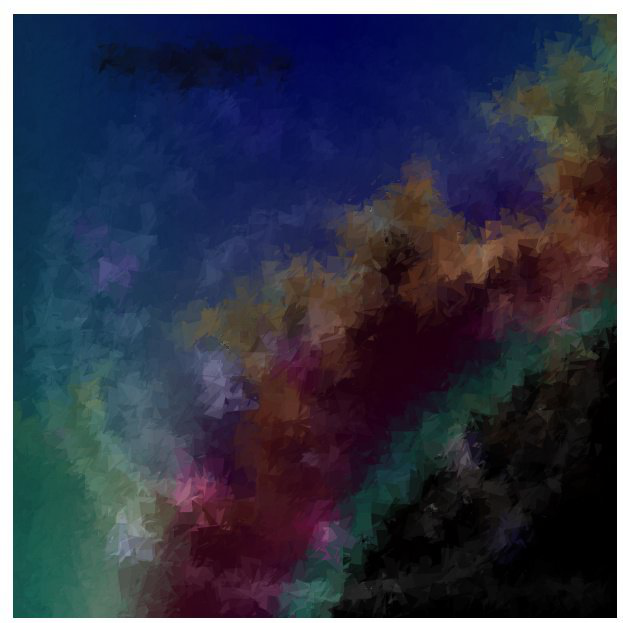

In [53]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image
from PIL import ImageChops


square_size = 10
offset_factor = 20
darken_factor = 0.1
path = r"posted/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

image = Image.open(filename0)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')
#Create a second image
square_size = 10
offset_factor = 20
darken_factor = 0.1
#image = Image.open("images/Sranger002.jpg")

size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(15,30)
        offset_factor = randint(15,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            #line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2b.jpg')


img0 = Image.open("images/Sranger-Tri-001-crop2a.jpg")
img1 = Image.open("images/Sranger-Tri-001-crop2b.jpg")
blen = ImageChops.blend(img0, img1, .5)
blen.save('images/Sranger-Tri-001-crop2b.jpg')
blen

!locate twython

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import time
base_image ="/home/jack/Documents/612x841jpg/paper_0022.jpg"
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(base_image)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')
#Create a second image
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(base_image)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
        #textin = (generate_the_word("wordcloud.txt"))

# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2b.jpg')


img0 = Image.open("images/Sranger-Tri-001-crop2a.jpg")
img1 = Image.open("images/Sranger-Tri-001-crop2b.jpg")
blen = ImageChops.blend(img0, img1, .5)
blen.save('images/Sranger-Tri-001-crop2b.jpg')


base = Image.open('images/Sranger-Tri-001-crop2b.jpg').convert('RGBA')

# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
x = 90
y = 10
#generate a title
title = (generate_the_word("titles.txt"))
d.text((x,y), title , font=fnt, fill=(0,0,0,250))
out2 = Image.alpha_composite(base, txt)
out2.save("images/TM_POSTa.jpg", "JPEG")

#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'


twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
#f = open("art.txt")
#text = f.read()
# Build the model.
#text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "images/TM_POSTa.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')


#photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])


# Chose a Random Image 

In [18]:
import random, os
path = r"/home/images"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename=(path+base_image)
print filename

/home/jack/Desktop/deep-dream-generator/notebooks/new/2/sepia20170617-114306.png


### Make a timer to add a randomness to the post

In [29]:
import time
time.sleep(20)
print "now"

now


In [28]:
%%writefile ImageBot1.py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import time
nap=randint(10,400)
time.sleep(nap)
path = r"/home/jack/Desktop/deep-dream-generator/notebooks/new/2/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])
filename0=(path+base_image)

#base_image ="/home/jack/Desktop/deep-dream-generator/notebooks/new/2/"
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(filename0)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')
#Create a second image
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(filename0)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
        #textin = (generate_the_word("wordcloud.txt"))

# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2b.jpg')


img0 = Image.open("images/Sranger-Tri-001-crop2a.jpg")
img1 = Image.open("images/Sranger-Tri-001-crop2b.jpg")
blen = ImageChops.blend(img0, img1, .5)
blen.save('images/Sranger-Tri-001-crop2b.jpg')

#---------------


base = Image.open('images/Sranger-Tri-001-crop2b.jpg').convert('RGBA')
 
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))
def generate_the_word(infile):
    with open(infile) as f:
            contents_of_file = f.read()
    lines = contents_of_file.splitlines()
    line_number = random.randrange(0, len(lines))
    return lines[line_number]
    

#base = Image.open('images/NewFolder/lightning01.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
marginx = 225
marginy = 50
x = width - marginx
y = height - marginy
signature_ = "The TwitterBot Project" 
d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

out = Image.alpha_composite(base, txt)
out.save("images/tmp.jpg", "JPEG")
# save the image then reopen to put a title
base = Image.open('images/tmp.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
x = 90
y = 10
#generate a title
title = (generate_the_word("titles.txt"))
d.text((x,y), title , font=fnt, fill=(0,0,0,250))
out2 = Image.alpha_composite(base, txt)
out2.save("images/TM_POST.jpg", "JPEG")


#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
#f = open("art.txt")
#text = f.read()
# Build the model.
#text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "images/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])


Overwriting ImageBot1.py


In [48]:
%%writefile ImageBot
#!/bin/bash

while true; do
  python ImageBot1.py
  echo "posted :"
  date
  sleep 1800s
done

Overwriting ImageBot


In [49]:
%%writefile ImageEffectsBot
#!/bin/bash

while true; do
  python ImageEffectsBot.py
  echo "posted :"
  date
  sleep 1800s
done

Overwriting ImageEffectsBot


In [50]:
%%writefile ImageEffectsBot
#!/bin/bash

while python ImageEffectsBot.py; do 1800s; done

Overwriting ImageEffectsBot


In [ ]:
# %load /home/jack/Desktop/pycode/vpython2/TrigonometryBot/twitterpost
#!/bin/bash

while true; do
  python twitterpost.py
  echo "posted :"
  date
  sleep 1800s
done

In [ ]:
# %load ImageBot
#!/bin/bash

while true; do
  python ImageBot1.py
  echo "posted :"
  date
  sleep 1800s
done

In [1]:
from PIL import Image, ImageChops

blen = ImageChops.blend(image1, image2, alpha)

In [ ]:
%reset -f

In [ ]:
#
# The Python Imaging Library.
# $Id: ImageChops.py 2134 2004-10-06 08:55:20Z fredrik $
#
# standard channel operations
#
# History:
# 1996-03-24 fl   Created
# 1996-08-13 fl   Added logical operations (for "1" images)
# 2000-10-12 fl   Added offset method (from Image.py)
#
# Copyright (c) 1997-2000 by Secret Labs AB
# Copyright (c) 1996-2000 by Fredrik Lundh
#
# See the README file for information on usage and redistribution.
#


from PIL import Image, ImageChops
##
# The <b>ImageChops</b> module contains a number of arithmetical image
# operations, called <i>channel operations</i> ("chops"). These can be
# used for various purposes, including special effects, image
# compositions, algorithmic painting, and more.
# <p>
# At this time, channel operations are only implemented for 8-bit
# images (e.g. &quot;L&quot; and &quot;RGB&quot;).
# <p>
# Most channel operations take one or two image arguments and returns
# a new image.  Unless otherwise noted, the result of a channel
# operation is always clipped to the range 0 to MAX (which is 255 for
# all modes supported by the operations in this module).
##

##
# Return an image with the same size as the given image, but filled
# with the given pixel value.
#
# @param image Reference image.
# @param value Pixel value.
# @return An image object.

def constant(image, value):
    "Fill a channel with a given grey level"

    return Image.new("L", image.size, value)

##
# Copy image.
#
# @param image Source image.
# @return A copy of the source image.

def duplicate(image):
    "Create a copy of a channel"

    return image.copy()

##
# Inverts an image
# (MAX - image).
#
# @param image Source image.
# @return An image object.

def invert(image):
    "Invert a channel"

    image.load()
    return image._new(image.im.chop_invert())

##
# Compare images, and return lighter pixel value
# (max(image1, image2)).
# <p>
# Compares the two images, pixel by pixel, and returns a new image
# containing the lighter values.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def lighter(image1, image2):
    "Select the lighter pixels from each image"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_lighter(image2.im))

##
# Compare images, and return darker pixel value
# (min(image1, image2)).
# <p>
# Compares the two images, pixel by pixel, and returns a new image
# containing the darker values.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def darker(image1, image2):
    "Select the darker pixels from each image"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_darker(image2.im))

##
# Calculate absolute difference
# (abs(image1 - image2)).
# <p>
# Returns the absolute value of the difference between the two images.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def difference(image1, image2):
    "Subtract one image from another"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_difference(image2.im))

##
# Superimpose positive images
# (image1 * image2 / MAX).
# <p>
# Superimposes two images on top of each other. If you multiply an
# image with a solid black image, the result is black. If you multiply
# with a solid white image, the image is unaffected.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def multiply(image1, image2):
    "Superimpose two positive images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_multiply(image2.im))

##
# Superimpose negative images
# (MAX - ((MAX - image1) * (MAX - image2) / MAX)).
# <p>
# Superimposes two inverted images on top of each other.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def screen(image1, image2):
    "Superimpose two negative images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_screen(image2.im))

##
# Add images
# ((image1 + image2) / scale + offset).
# <p>
# Adds two images, dividing the result by scale and adding the
# offset. If omitted, scale defaults to 1.0, and offset to 0.0.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def add(image1, image2, scale=1.0, offset=0):
    "Add two images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_add(image2.im, scale, offset))

##
# Subtract images
# ((image1 - image2) / scale + offset).
# <p>
# Subtracts two images, dividing the result by scale and adding the
# offset. If omitted, scale defaults to 1.0, and offset to 0.0.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def subtract(image1, image2, scale=1.0, offset=0):
    "Subtract two images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_subtract(image2.im, scale, offset))

##
# Add images without clipping
# ((image1 + image2) % MAX).
# <p>
# Adds two images, without clipping the result.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def add_modulo(image1, image2):
    "Add two images without clipping"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_add_modulo(image2.im))

##
# Subtract images without clipping
# ((image1 - image2) % MAX).
# <p>
# Subtracts two images, without clipping the result.
#
# @param image1 First image.
# @param image1 Second image.
# @return An image object.

def subtract_modulo(image1, image2):
    "Subtract two images without clipping"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_subtract_modulo(image2.im))

##
# Logical AND
# (image1 and image2).

def logical_and(image1, image2):
    "Logical and between two images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_and(image2.im))

##
# Logical OR
# (image1 or image2).

def logical_or(image1, image2):
    "Logical or between two images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_or(image2.im))

##
# Logical XOR
# (image1 xor image2).

def logical_xor(image1, image2):
    "Logical xor between two images"

    image1.load()
    image2.load()
    return image1._new(image1.im.chop_xor(image2.im))

##
# Blend images using constant transparency weight.
# <p>
# Same as the <b>blend</b> function in the <b>Image</b> module.

def blend(image1, image2, alpha):
    "Blend two images using a constant transparency weight"

    return Image.blend(image1, image2, alpha)

##
# Create composite using transparency mask.
# <p>
# Same as the <b>composite</b> function in the <b>Image</b> module.

def composite(image1, image2, mask):
    "Create composite image by blending images using a transparency mask"

    return Image.composite(image1, image2, mask)

##
# Offset image data.
# <p>
# Returns a copy of the image where data has been offset by the given
# distances.  Data wraps around the edges.  If yoffset is omitted, it
# is assumed to be equal to xoffset.
#
# @param image Source image.
# @param xoffset The horizontal distance.
# @param yoffset The vertical distance.  If omitted, both
#    distances are set to the same value.
# @return An Image object.

def offset(image, xoffset, yoffset=None):
    "Offset image in horizontal and/or vertical direction"
    if yoffset is None:
        yoffset = xoffset
    image.load()
    return image._new(image.im.offset(xoffset, yoffset))


In [55]:
!ls publish

20170819154830.jpg  20170819181154.jpg	20170819181407.jpg  20170819181620.jpg
20170819154833.jpg  20170819181158.jpg	20170819181411.jpg  20170819181623.jpg
20170819160829.jpg  20170819181201.jpg	20170819181414.jpg  20170819181627.jpg
20170819160835.jpg  20170819181204.jpg	20170819181417.jpg  20170819181630.jpg
20170819160839.jpg  20170819181207.jpg	20170819181420.jpg  20170819181633.jpg
20170819160845.jpg  20170819181210.jpg	20170819181423.jpg  20170819181636.jpg
20170819160851.jpg  20170819181213.jpg	20170819181426.jpg  20170819181639.jpg
20170819160913.jpg  20170819181216.jpg	20170819181429.jpg  20170819181642.jpg
20170819160916.jpg  20170819181219.jpg	20170819181432.jpg  20170819181645.jpg
20170819160925.jpg  20170819181222.jpg	20170819181435.jpg  20170819181648.jpg
20170819160928.jpg  20170819181225.jpg	20170819181438.jpg  20170819181651.jpg
20170819160932.jpg  20170819181229.jpg	20170819181441.jpg  20170819181654.jpg
20170819160953.jpg  20170819181232.jpg	20170819181444.jpg  20170

# On the Dark Side

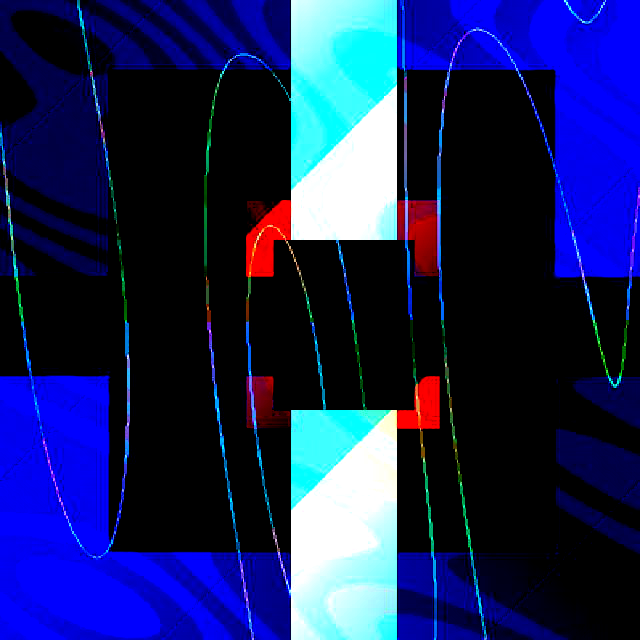

In [225]:
from PIL import Image, ImageChops
path = r"experiment/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

path0 = r"blend/"
base_image0 = random.choice([
    x0 for x0 in os.listdir(path0)
    if os.path.isfile(os.path.join(path0, x0))
    ])
filename00=(path0+base_image0)

image1=Image.open(filename0)
image2=Image.open(filename00)
subt = ImageChops.subtract(image1, image2, scale=0.5, offset=0)

filename_ = time.strftime("darkimages/%Y%m%d%H%M%S.jpg")
subt.save(filename_)

subt


# Working Fine Mask and save

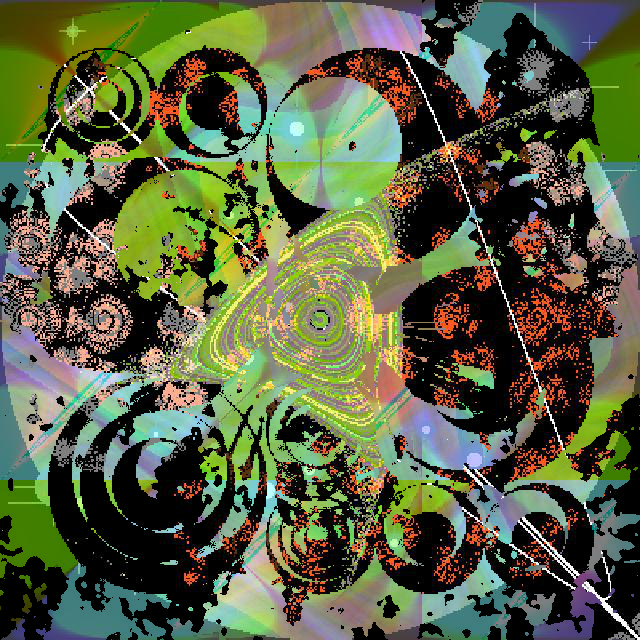

In [233]:
from PIL import Image, ImageChops
path = r"experiment/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

path0 = r"blend/"
base_image0 = random.choice([
    x0 for x0 in os.listdir(path0)
    if os.path.isfile(os.path.join(path0, x0))
    ])
filename00=(path0+base_image0)

path1 = r"masks/"
base_image1 = random.choice([
    x1 for x1 in os.listdir(path1)
    if os.path.isfile(os.path.join(path1, x1))
    ])
mask0=(path1+base_image1)




im0 = Image.open(filename0)
im1 = im0.resize((640,640), Image.NEAREST)

im01 = Image.open(filename00)
im2 = im01.resize((640,640), Image.NEAREST)
    
im03 = Image.open(mask0)
    
    
result1 = ImageChops.composite(im1, im2, im03)
filename = time.strftime("publish/%Y%m%d%H%M%S.jpg")
result1.save(filename)

result1    

In [236]:
from PIL import Image, ImageChops
import time
count = 0    
while count <350:    
    path = r"experiment/"
    base_image = random.choice([
        x for x in os.listdir(path)
        if os.path.isfile(os.path.join(path, x))
        ])
    filename0=(path+base_image)

    path0 = r"build/"
    base_image0 = random.choice([
        x0 for x0 in os.listdir(path0)
        if os.path.isfile(os.path.join(path0, x0))
        ])
    filename00=(path0+base_image0)

    path1 = r"testmasks/"
    base_image1 = random.choice([
        x1 for x1 in os.listdir(path1)
        if os.path.isfile(os.path.join(path1, x1))
        ])
    mask0=(path1+base_image1)




    im0 = Image.open(filename0)
    im1 = im0.resize((640,640), Image.NEAREST)

    im01 = Image.open(filename00)
    im2 = im01.resize((640,640), Image.NEAREST)

    im03 = Image.open(mask0)
    im04 = im03.resize((640,640), Image.NEAREST)

    time.sleep(3)
    result1 = ImageChops.composite(im1, im2, im04)
    filename = time.strftime("darkimages/%Y%m%d%H%M%S.jpg")
    result1.save(filename)
    count = count +1
   

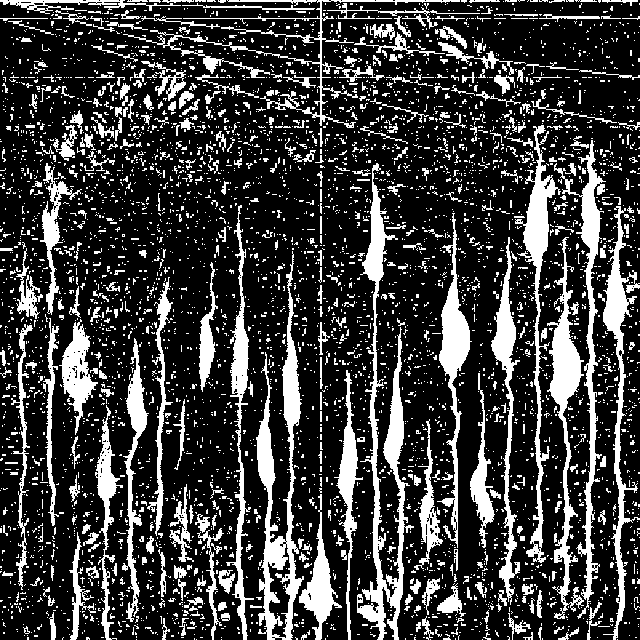

In [218]:
from PIL import Image
import time

path = r"publish/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)

col = Image.open(filename0)
gray = col.convert('L')
bw = gray.point(lambda x: 0 if x<150 else 255, '1')
bw
#bw.save("result_bw.png")

In [219]:
filename = time.strftime("masks/%Y%m%d%H%M%S.jpg")
bw.save(filename)


In [184]:
!mkdir darkimages

In [68]:
!ls output

20170819192831.jpg


In [ ]:
 path1 = r"masks/"
    base_image1 = random.choice([
        x1 for x1 in os.listdir(path1)
        if os.path.isfile(os.path.join(path1, x1))
    ])
    mask0=(path1+base_image1)




    im0 = Image.open(filename0)
    im1 = im0.resize((640,640), Image.NEAREST)

    im01 = Image.open(filename00)
    im2 = im01.resize((640,640), Image.NEAREST)
    
    im03 = Image.open(mask0)
    
    
    result1 = ImageChops.composite(im1, im2, im03) 
    

In [ ]:
# %load ImageBot.py
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import random
from random import randint
from PIL import Image, ImageDraw, ImageFont, ImageChops 
import os
import sys
import markovify
sys.path.insert(0,"/home/jack/anaconda2/envs/py27/lib/python2.7/site-packages")
import twython
from twython import Twython
import time
base_image ="images/Sranger.jpg"
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(base_image)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2a.jpg')
#Create a second image
square_size = 10
offset_factor = 20
darken_factor = 0.1
image = Image.open(base_image)
size = image.size

# Create image np array
im = np.array(image, dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Add random offset to tuple based on offset_factor
def add_offet(t):
    t[0] = random.randint(t[0], (t[0] + offset_factor))
    t[1] = random.randint(t[1], (t[1] + offset_factor))

    return t


def generate_the_word(infile):
        with open(infile) as f:
            contents_of_file = f.read()
        lines = contents_of_file.splitlines()
        line_number = random.randrange(0, len(lines))
        return lines[line_number]
        #textin = (generate_the_word("wordcloud.txt"))

# Create a Rectangle patch
for w in xrange(0, size[0], square_size):
    for h in xrange(0, size[1], square_size):
        #print str(w) + ':' + str(h)
        square_size = randint(10,30)
        offset_factor = randint(10,30)
    
        # Get the average color of the section
        rect = im[h:h+square_size, w:w+square_size]
        mean = rect.mean(axis=(0,1))

        # Convert to hex value
        face_color = '#%02x%02x%02x' % (int(mean[0]), int(mean[1]), int(mean[2]))
        edge_color = '#%02x%02x%02x' % (int(mean[0] - (mean[0] * darken_factor)), int(mean[1]  - (mean[1] * darken_factor)), int(mean[2] - (mean[2] * darken_factor)))

        # Dont draw outline with the dominant color
        z_order = 2
        if '#e' in face_color or '#f' in face_color:
            line_width = 0.0
        else:
            line_width = 0.1
            z_order = 3

        points = [add_offet([w, h]), add_offet([w + square_size, h]), add_offet([w, h + square_size])]
        triangle1 = patches.Polygon(points, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Second triangle
        points2 = [add_offet([w, h + square_size]), add_offet([w + square_size, h + square_size]), add_offet([w + square_size, h])]
        triangle2 = patches.Polygon(points2, edgecolor=edge_color, linewidth=line_width, facecolor=face_color, zorder=z_order)

        # Square in background
        rec = patches.Rectangle((w,h),square_size,square_size,linewidth=0.0, edgecolor=edge_color, facecolor=face_color, zorder=1)

        # Add the patch to the Axes
        ax.add_patch(triangle1)
        ax.add_patch(triangle2)
        ax.add_patch(rec)

plt.axis('off')
plt.savefig("images/Sranger-Tri-001a.jpg", bbox_inches='tight', dpi=200)
img = Image.open("images/Sranger-Tri-001a.jpg")
nonwhite_positions = [(x,y) for x in range(img.size[0]) for y in range(img.size[1]) if img.getdata()[x+y*img.size[0]] != (255,255,255)]
rect = (min([x for x,y in nonwhite_positions]), min([y for x,y in nonwhite_positions]), max([x for x,y in nonwhite_positions]), max([y for x,y in nonwhite_positions]))
img.crop(rect).save('images/Sranger-Tri-001-crop2b.jpg')


img0 = Image.open("images/Sranger-Tri-001-crop2a.jpg")
img1 = Image.open("images/Sranger-Tri-001-crop2b.jpg")
blen = ImageChops.blend(img0, img1, .5)
blen.save('images/Sranger-Tri-001-crop2b.jpg')

#---------------


base = Image.open('images/Sranger-Tri-001-crop2b.jpg').convert('RGBA')
 
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))
def generate_the_word(infile):
    with open(infile) as f:
            contents_of_file = f.read()
    lines = contents_of_file.splitlines()
    line_number = random.randrange(0, len(lines))
    return lines[line_number]
    

#base = Image.open('images/NewFolder/lightning01.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 20)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = out.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
marginx = 225
marginy = 50
x = width - marginx
y = height - marginy
signature_ = "The TwitterBot Project" 
d.text((x,y), signature_, font=fnt, fill=(0,0,0,256))

out = Image.alpha_composite(base, txt)
out.save("images/NewFolder/tmp.jpg", "JPEG")
# save the image then reopen to put a title
base = Image.open('images/NewFolder/tmp.jpg').convert('RGBA')
#8 5 4 6 3 2
# make a blank image for the text, initialized to transparent text color
txt = Image.new('RGBA', base.size, (255,255,255,0))

# get a font
fnt = ImageFont.truetype("/home/jack/.fonts/Exo-Black.ttf", 50)
# get a drawing context
d = ImageDraw.Draw(txt)

width, height = base.size
# calculate the x,y coordinates of the text
#marginx = 325
#marginy = 75
x = 90
y = 10
#generate a title
title = (generate_the_word("titles.txt"))
d.text((x,y), title , font=fnt, fill=(0,0,0,250))
out2 = Image.alpha_composite(base, txt)
out2.save("images/NewFolder/TM_POST.jpg", "JPEG")


#removed keys for privacy reasons
CONSUMER_KEY = 'YazCRIfWX4VICiRCOiph08jDL'
CONSUMER_SECRET = 'QOkLHou6NMwkghSHjMFXMdffQKJlDzttKtP6uBCcZ4VlQtvJyc'
ACCESS_KEY = '296906916-AWggjhqpEWIS7EzXXhc2pOPBeCVJczpOm11cQGIf'
ACCESS_SECRET = 'zFrCiyaPt8gCBVVs1bLCmdCSyQQ3DKxT5wHJq2tOu2AMj'

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)
#path = 'images/NewFolder'
#f = open("art.txt")
#text = f.read()
# Build the model.
#text_model = markovify.Text(text)
# Print randomly-generated sentences of no more than 140 characters
#http://paulbourke.net/fractals/
#STR = (text_model.make_short_sentence(140))
STR = ("#All_in_One - #WordCloud #Create - Added ability to randomly choose an image background  #Automated")
#PATH = "/home/jack/Desktop/deep-dream-generator/notebooks/STUFF/experiment/experiment8.jpg"
PATH = "images/NewFolder/TM_POST.jpg"
# 1 , 2, 3, 12, 5, 15, 8, 6
#photo = open('/home/jack/Desktop/deep-dream-generator/notebooks/images/'+file_list[rnd]+'.jpg','rb')

#photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])